In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#%cd drive/MyDrive/Github/master_thesis
%cd drive/MyDrive/GitHub/master-thesis
from clustering.utils import *

/content/drive/MyDrive/GitHub/master-thesis


# Preprocessing

In [4]:
beh_cols = get_behaviour_cols()
df_pca_input = get_preprocessed_data(impute=True, impute_cols=beh_cols, start='2020-08-01', end='2021-02-02')

In [5]:
# Train Test Split
end_train = '2020-12-01'
df_pca_input_train = df_pca_input[(df_pca_input.date < end_train)]
max(df_pca_input_train.date)

Timestamp('2020-11-30 00:00:00')

In [6]:
scaler = MinMaxScaler()
pca_input_train = scaler.fit_transform(df_pca_input_train[beh_cols].to_numpy())
pca_input = scaler.fit_transform(df_pca_input[beh_cols].to_numpy())
pca_input.shape

(47263, 30)

In [7]:
pca_input_train = df_pca_input_train[beh_cols].to_numpy()

# PCA

In [8]:
pca = PCA(whiten=False)
pca.fit(pca_input_train)
x_pca = pca.transform(pca_input)
df_pca = pd.DataFrame(x_pca)
for column in df_pca.columns:
  df_pca.rename(columns={column: 'PC_'+str(column)}, inplace=True)
df_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29
0,20.915389,7.556836,6.571073,0.219179,1.098235,-2.049695,-2.627721,-1.929819,1.799456,-0.322020,...,-1.556230,0.779266,1.496457,0.840182,1.908665,2.511091,0.154218,0.560619,-0.018315,0.748785
1,22.169463,8.044431,7.493487,1.111197,0.565204,-1.888365,-2.857659,-1.559387,1.085568,-0.476970,...,-0.732336,1.067690,1.658933,0.536585,2.289445,2.016031,0.898707,0.164114,0.096296,0.782862
2,19.921966,7.930551,5.843287,0.715518,1.169294,-1.362617,-2.331789,-2.101610,1.252425,-0.174947,...,-1.168657,1.534373,1.507763,0.563178,2.074128,2.225166,0.575176,0.285792,-0.106529,0.710619
3,19.794707,8.629530,5.599544,0.925995,0.391192,-1.707778,-3.082629,-2.194035,1.644465,-0.931390,...,-0.721571,1.240124,1.739888,0.781905,2.141190,2.292274,0.757692,0.317087,-0.089861,0.691747
4,19.564509,8.512928,6.472713,0.076597,0.587602,-1.575570,-2.700510,-1.237248,1.324272,-0.293407,...,-0.737873,1.251815,1.844614,0.819780,2.141028,2.337273,0.802276,0.298578,-0.076583,0.578991


# Evaluate Results

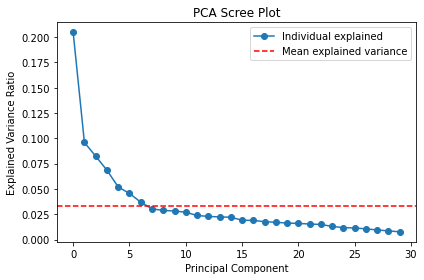

In [9]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#factor = 6.69287272 / exp_var_pca[0]
#exp_var_pca = exp_var_pca * factor
plt.plot(range(0,len(exp_var_pca)), exp_var_pca, label='Individual explained', marker='o')
#plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.axhline(y=exp_var_pca.mean(), color='r', linestyle='dashed', label='Mean explained variance')
plt.legend(loc='best')
plt.title('PCA Scree Plot')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (11.7,8.27)
plt.show()

In [10]:
num_comp_avg = (exp_var_pca > exp_var_pca.mean()).sum()
explained_variance = cum_sum_eigenvalues[num_comp_avg-1]
print(f'{num_comp_avg} Komponenten sind größer als der Durchschnitt und erklären damit {np.round(explained_variance * 100, 2)}% der Varianz in den Daten.')

7 Komponenten sind größer als der Durchschnitt und erklären damit 58.63% der Varianz in den Daten.


In [11]:
num_comp = 6
cum_sum_eigenvalues

array([0.20475929, 0.30069492, 0.38313943, 0.45171157, 0.50369608,
       0.54931534, 0.58631166, 0.61669611, 0.64550783, 0.67373064,
       0.70077981, 0.72458222, 0.74747856, 0.76988034, 0.79196409,
       0.81107153, 0.83003842, 0.84771088, 0.8648149 , 0.88110694,
       0.89706198, 0.91245096, 0.92736069, 0.94035528, 0.95216371,
       0.96363553, 0.97423668, 0.98375596, 0.99234017, 1.        ])

Die Dimensionen sollen soweit reduziert werden, dass noch 80% der Varianz benötigt werden.

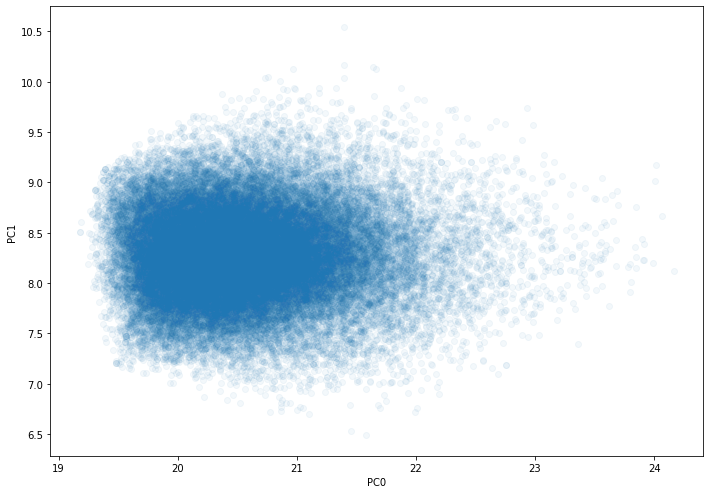

In [12]:
plt.scatter(x=df_pca['PC_0'], y=df_pca['PC_1'], alpha=0.05)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

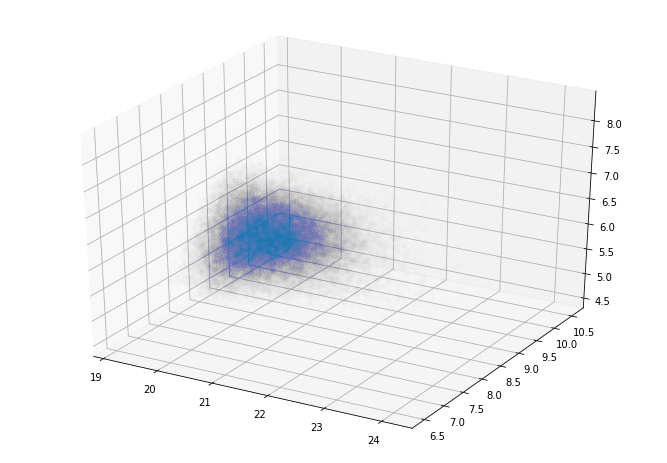

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca['PC_0'], df_pca['PC_1'], df_pca['PC_2'], alpha=0.005)

# Write Data

In [14]:
col_names = df_pca.iloc[:,:num_comp].columns.tolist()
subset_drop = col_names + ['date']
df_pca_write = pd.concat([df_pca.iloc[:,:num_comp].copy(), df_pca_input], axis=1)
df_pca_write.dropna(subset=subset_drop, inplace=True)
df_pca_write.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47263 entries, 0 to 47262
Data columns (total 86 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   PC_0                                           47263 non-null  float64       
 1   PC_1                                           47263 non-null  float64       
 2   PC_2                                           47263 non-null  float64       
 3   PC_3                                           47263 non-null  float64       
 4   PC_4                                           47263 non-null  float64       
 5   PC_5                                           47263 non-null  float64       
 6   gender                                         47263 non-null  int64         
 7   postnr                                         47263 non-null  int64         
 8   region                                         47263 non

In [15]:
df_pca_write.to_csv('data/preprocessing/dim_reduction/pca_data.csv', index=False)

# Evaluate PCA Components

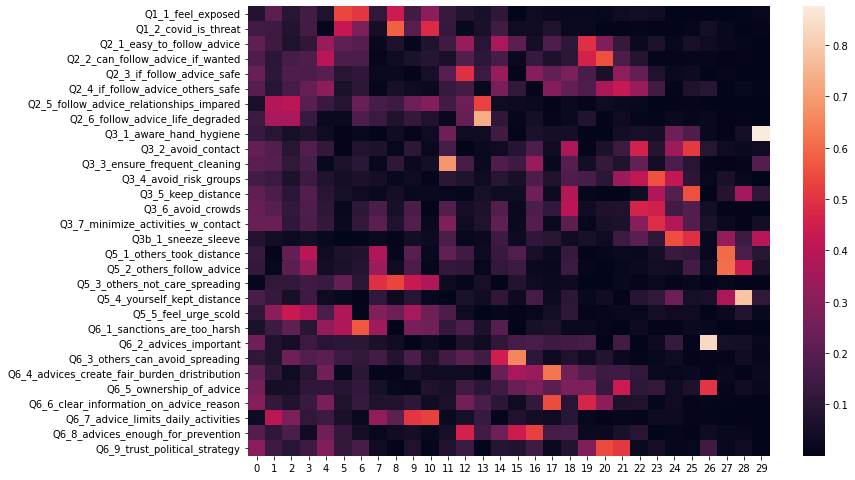

In [16]:
import seaborn as sns
df_components = pd.DataFrame(pca.components_, columns=beh_cols).transpose()
df_components = df_components.apply(lambda x: np.abs(x))
sns.heatmap(df_components) # .iloc[:,:nr_pc_80]

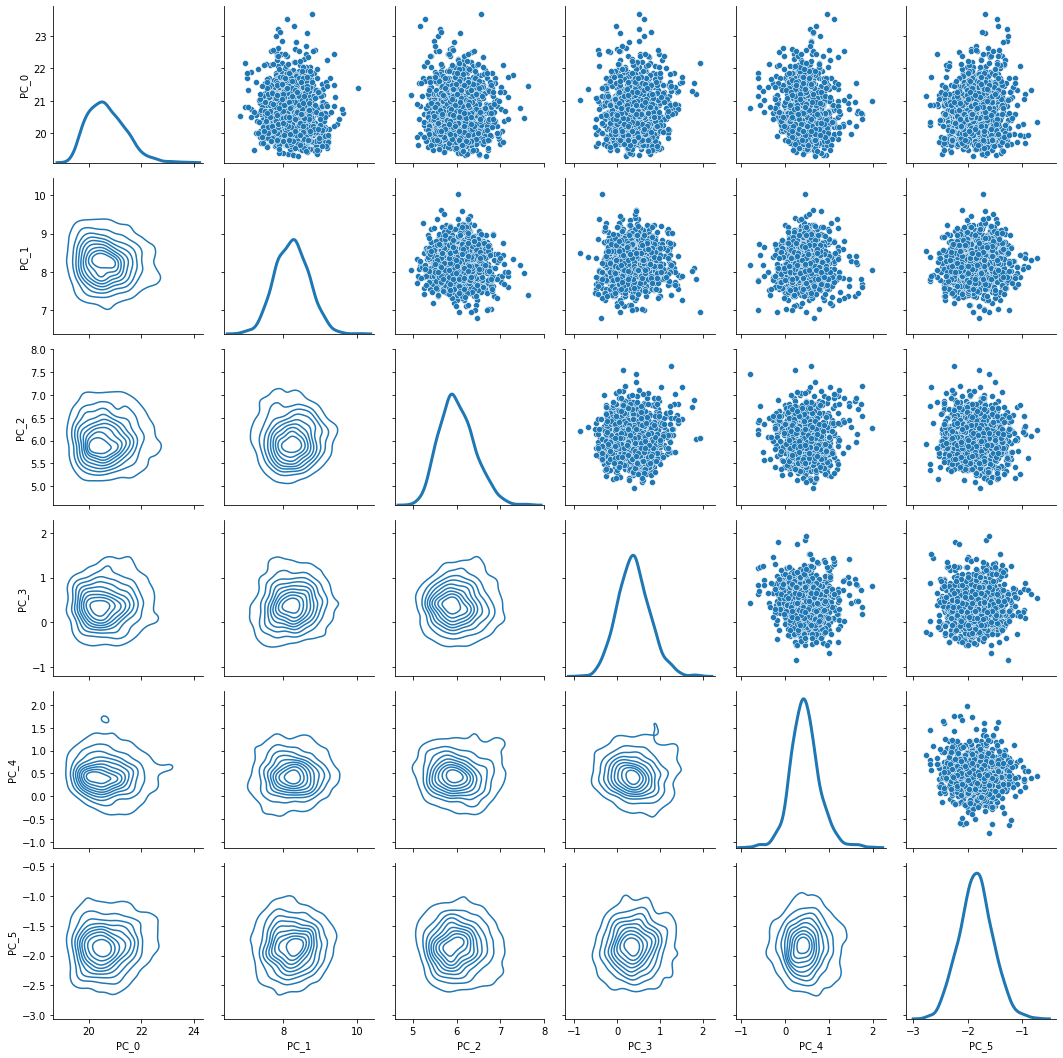

In [17]:
start = '2020-12-01'
end = '2020-12-07'
df_plot = df_pca_write.copy()
df_plot.date = pd.to_datetime(df_plot.date)
in_range = (df_plot.date > start) & (df_plot.date < end)
df_plot = df_plot[in_range]
df_plot = df_plot[col_names]
g = sns.PairGrid(data=df_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [18]:
import plotly.express as px
df_lineplot = df_pca_write[subset_drop].groupby('date').mean().reset_index()
df_lineplot[col_names] = df_lineplot[col_names].rolling(3).mean()
px.line(df_lineplot, x='date', y=col_names)